In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('premierleaguestats_values.csv')

In [3]:
#Dropping insignificant columns to the analysis. Not good indicators of performance
columns_to_drop = ['Jersey Number', 'Nationality', 'Hit woodwork', 'Own goals', 'Goal Kicks', 'Headed goals',  'Goals with right foot',  'Goals with left foot']
df.drop(columns=columns_to_drop, inplace=True)

In [4]:
df = df.drop_duplicates(subset='Name')

In [5]:
#replacing the NAs with zeros to keep consistency in the dataset
df.fillna(0, inplace=True)

In [6]:
df.dtypes

Name                       object
Club                       object
Position                   object
Age                       float64
Appearances                 int64
Wins                        int64
Losses                      int64
Goals                       int64
Goals per match           float64
Penalties scored          float64
Freekicks scored          float64
Shots                     float64
Shots on target           float64
Shooting accuracy %        object
Big chances missed        float64
Clean sheets              float64
Goals conceded            float64
Tackles                   float64
Tackle success %           object
Last man tackles          float64
Blocked shots             float64
Interceptions             float64
Clearances                float64
Headed Clearance          float64
Clearances off line       float64
Recoveries                float64
Duels won                 float64
Duels lost                float64
Successful 50/50s         float64
Aerial battles

In [7]:
#converting the percentage columns to numbers (intially objects)
percentage_columns = ['Shooting accuracy %', 'Tackle success %', 'Cross accuracy %']
for col in percentage_columns:
    df[col] = df[col].str.rstrip('%').astype('float64') / 100

In [8]:
df.head()

,Name,Club,Position,Age,Appearances,Wins,Losses,Goals,Goals per match,Penalties scored,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Yellow cards,Red cards,Fouls,Offsides,Current Value
0,bernd leno,Arsenal,Goalkeeper,28.0,64,28,16,0,0.0,0.0,...,34.0,26.0,17.0,28.0,375.0,2,0,0,0.0,10000000.0
1,matt macey,Arsenal,Goalkeeper,26.0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0
2,rúnar alex rúnarsson,Arsenal,Goalkeeper,25.0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,1500000.0
3,héctor bellerín,Arsenal,Defender,25.0,160,90,37,7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,23,0,125,8.0,8000000.0
4,kieran tierney,Arsenal,Defender,23.0,16,7,5,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0,9,0.0,25000000.0


In [9]:
df.describe()

,Age,Appearances,Wins,Losses,Goals,Goals per match,Penalties scored,Freekicks scored,Shots,Shots on target,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Yellow cards,Red cards,Fouls,Offsides,Current Value
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,25.744308,68.823117,28.957968,23.896673,7.327496,1.433205,0.527145,0.157618,55.471103,19.977233,...,2.978984,5.542907,2.511384,3.089317,25.376532,7.917688,0.301226,53.033275,9.726795,1.103573e+07
std,4.504709,81.797516,38.969376,28.488376,16.810490,6.028720,2.513936,0.741992,118.184054,46.107972,...,17.894807,32.133977,16.344680,18.353280,134.414964,11.556811,0.698607,75.605560,25.170136,1.692149e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,22.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.250000e+05
50%,26.000000,36.000000,12.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,22.000000,1.000000,3.500000e+06
75%,29.000000,108.000000,41.000000,36.000000,6.000000,0.160000,0.000000,0.000000,47.000000,15.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,74.000000,7.000000,1.500000e+07
max,38.000000,539.000000,272.000000,158.000000,180.000000,57.000000,27.000000,8.000000,996.000000,411.000000,...,269.000000,391.000000,249.000000,257.000000,1516.000000,81.000000,5.000000,438.000000,203.000000,1.100000e+08


In [10]:
#dividing the dataset up by position and analyzing the metrics
positions = df['Position'].unique()
for position in positions:
    position_data = df[df['Position'] == position]
    print(f"Statistics for {position}:")
    print(position_data.describe())

Statistics for Goalkeeper:
             Age  Appearances        Wins      Losses  Goals  Goals per match  \
count  69.000000    69.000000   69.000000   69.000000   69.0             69.0   
mean   28.173913    51.826087   21.739130   18.115942    0.0              0.0   
std     4.721529    78.690189   38.169765   26.680317    0.0              0.0   
min    19.000000     0.000000    0.000000    0.000000    0.0              0.0   
25%    25.000000     0.000000    0.000000    0.000000    0.0              0.0   
50%    28.000000     7.000000    4.000000    4.000000    0.0              0.0   
75%    32.000000    74.000000   28.000000   23.000000    0.0              0.0   
max    38.000000   340.000000  174.000000  104.000000    0.0              0.0   

       Penalties scored  Freekicks scored  Shots  Shots on target  ...  \
count              69.0              69.0   69.0             69.0  ...   
mean                0.0               0.0    0.0              0.0  ...   
std                 0

              Age  Appearances        Wins      Losses       Goals  \
count  110.000000   110.000000  110.000000  110.000000  110.000000   
mean    25.372727    77.381818   32.654545   26.972727   21.481818   
std      4.248819    79.074112   40.805746   27.237811   30.948531   
min     17.000000     0.000000    0.000000    0.000000    0.000000   
25%     22.250000    19.000000    4.000000    8.250000    1.000000   
50%     25.000000    39.500000   14.000000   16.500000    6.000000   
75%     28.750000   119.000000   43.000000   43.750000   36.750000   
max     34.000000   346.000000  177.000000  143.000000  180.000000   

       Goals per match  Penalties scored  Freekicks scored       Shots  \
count       110.000000        110.000000        110.000000  110.000000   
mean          0.919455          1.590909          0.172727  149.009091   
std           2.812830          4.039474          0.618656  189.935406   
min           0.000000          0.000000          0.000000    0.000000   

In [11]:
mean_stats_by_position = df.groupby('Position')['Shots', 'Tackles'].mean().reset_index()

C:\Users\ehoml\AppData\Local\Temp\ipykernel_13576\1220080762.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_stats_by_position = df.groupby('Position')['Shots', 'Tackles'].mean().reset_index()


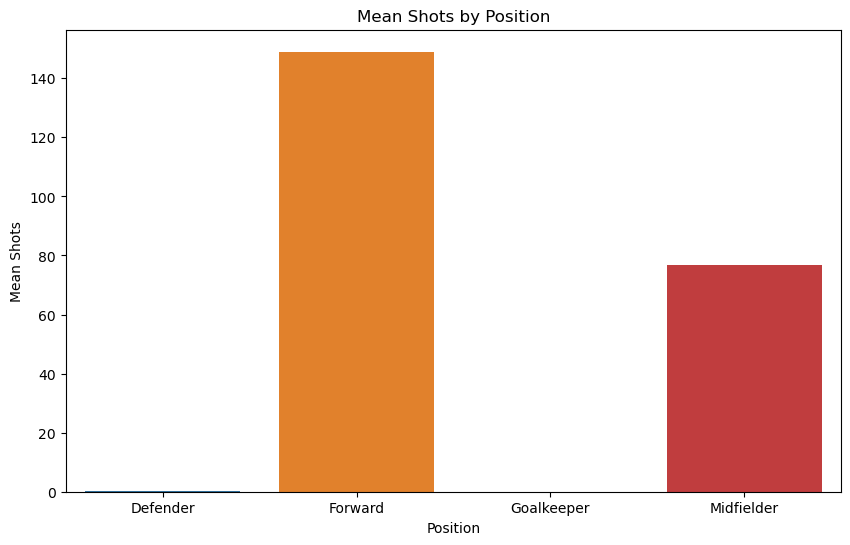

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Position', y='Shots', data=mean_stats_by_position)
plt.title('Mean Shots by Position')
plt.xlabel('Position')
plt.ylabel('Mean Shots')
plt.show()

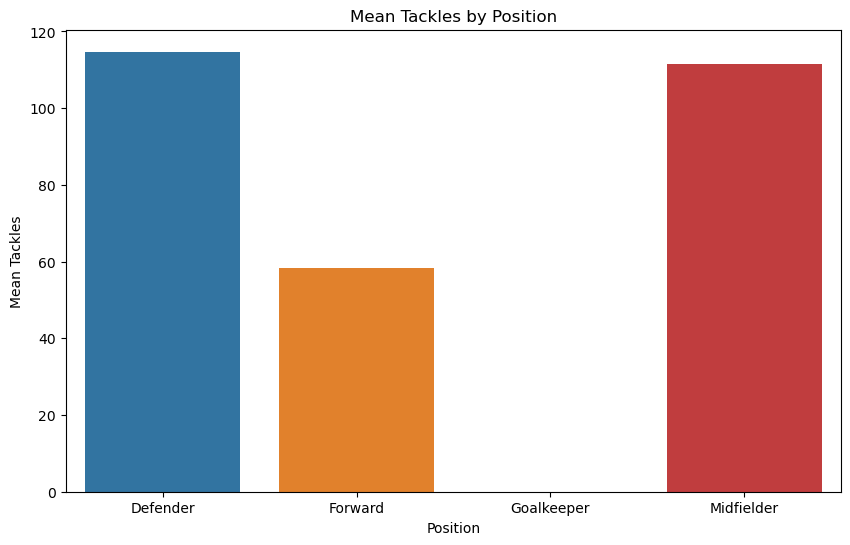

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Position', y='Tackles', data=mean_stats_by_position)
plt.title('Mean Tackles by Position')
plt.xlabel('Position')
plt.ylabel('Mean Tackles')
plt.show()

# Player Performance Assessment

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
position_kpis = {
    'Goalkeeper': ['Saves', 'Clean sheets', 'Goals conceded', 'High Claims', 'Punches'],
    'Defender': ['Tackles', 'Interceptions', 'Clearances', 'Blocked shots', 'Duels won', 'Aerial battles won'],
    'Midfielder': ['Assists', 'Passes', 'Passes per match', 'Through balls', 'Tackles', 'Interceptions', 'Big chances created'],
    'Forward': ['Goals', 'Shots on target', 'Shooting accuracy %', 'Big chances created', 'Assists']
}
scaler = MinMaxScaler(feature_range=(1, 10))
for position, kpis in position_kpis.items():
    position_data = df[df['Position'] == position]
    
    # Normalize the KPIs
    normalized_kpis = scaler.fit_transform(position_data[kpis].fillna(0))
    
    # Composite score calculation
    position_data['Composite Score'] = normalized_kpis.mean(axis=1)

    # Assign score
    position_data['Player Score'] = position_data['Composite Score'].round()

    #Sorting the top players in descending order
    top_players = position_data.sort_values(by='Player Score', ascending=False)

    # Reset index for cleaner output
    top_players = top_players.reset_index(drop=True)

    # Display of top 10 players
    num_top_players = 10 
    print(f"Top {num_top_players} players in {position} based on scores:\n", top_players[['Name', 'Player Score']].head(num_top_players))

Top 10 players in Goalkeeper based on scores:
                 Name  Player Score
0           joe hart          10.0
1   lukasz fabianski           8.0
2       david de gea           7.0
3        hugo lloris           7.0
4    wayne hennessey           6.0
5  kasper schmeichel           6.0
6       scott carson           4.0
7    jordan pickford           4.0
8         john ruddy           4.0
9             adrián           4.0
Top 10 players in Defender based on scores:
                  Name  Player Score
0       phil jagielka           9.0
1         gary cahill           9.0
2       phil bardsley           7.0
3       james tomkins           7.0
4         jonny evans           7.0
5         kyle walker           7.0
6  branislav ivanovic           6.0
7   césar azpilicueta           6.0
8      chris smalling           6.0
9     virgil van dijk           5.0
Top 10 players in Midfielder based on scores:
                Name  Player Score
0  jordan henderson           8.0
1      james

C:\Users\ehoml\AppData\Local\Temp\ipykernel_13576\232917127.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_data['Composite Score'] = normalized_kpis.mean(axis=1)
C:\Users\ehoml\AppData\Local\Temp\ipykernel_13576\232917127.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_data['Player Score'] = position_data['Composite Score'].round()
C:\Users\ehoml\AppData\Local\Temp\ipykernel_13576\232917127.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

C:\Users\ehoml\AppData\Local\Temp\ipykernel_13576\3198317863.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_data['Composite Score'] = normalized_kpis.mean(axis=1)
C:\Users\ehoml\AppData\Local\Temp\ipykernel_13576\3198317863.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  composite_scores = composite_scores.append(position_data[['Name', 'Position', 'Composite Score']])
C:\Users\ehoml\AppData\Local\Temp\ipykernel_13576\3198317863.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<Figure size 1000x600 with 0 Axes>

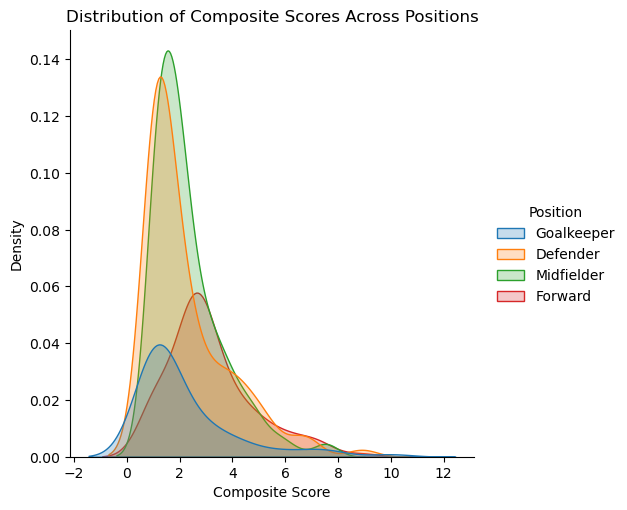

In [16]:
#Creating the score based on the KPIs
composite_scores = pd.DataFrame()

for position, kpis in position_kpis.items():
    position_data = df[df['Position'] == position]
    
    
    normalized_kpis = scaler.fit_transform(position_data[kpis].fillna(0))
    
   
    position_data['Composite Score'] = normalized_kpis.mean(axis=1)

    # Combine the scores in a single DataFrame
    composite_scores = composite_scores.append(position_data[['Name', 'Position', 'Composite Score']])

# Visualization of Distribution of Composite Scores
plt.figure(figsize=(10, 6))
sns.displot(data=composite_scores, x='Composite Score', hue='Position', kind='kde', fill=True)
plt.title('Distribution of Composite Scores Across Positions')
plt.xlabel('Composite Score')
plt.ylabel('Density')
plt.show()

C:\Users\ehoml\AppData\Local\Temp\ipykernel_13576\3202867717.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_data['Composite Score'] = normalized_kpis.mean(axis=1)


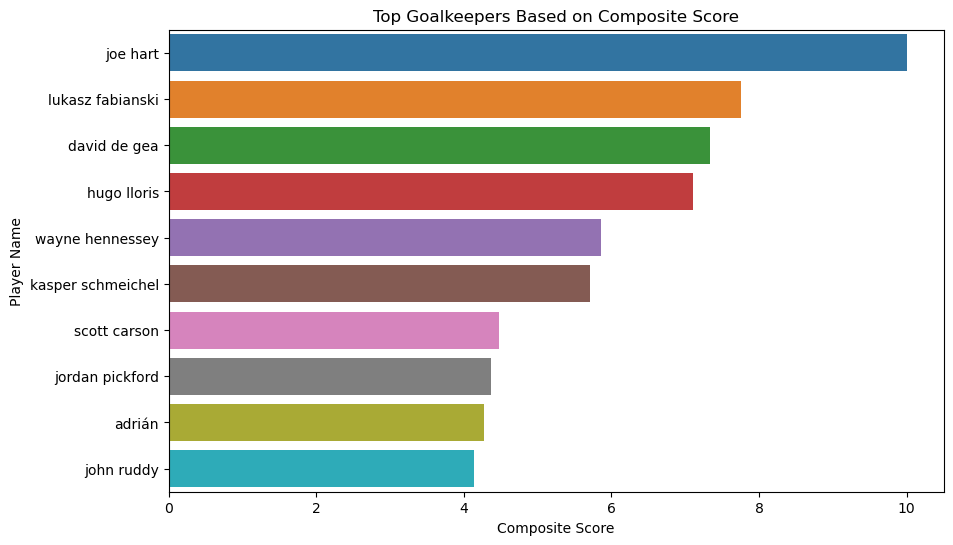

C:\Users\ehoml\AppData\Local\Temp\ipykernel_13576\3202867717.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_data['Composite Score'] = normalized_kpis.mean(axis=1)


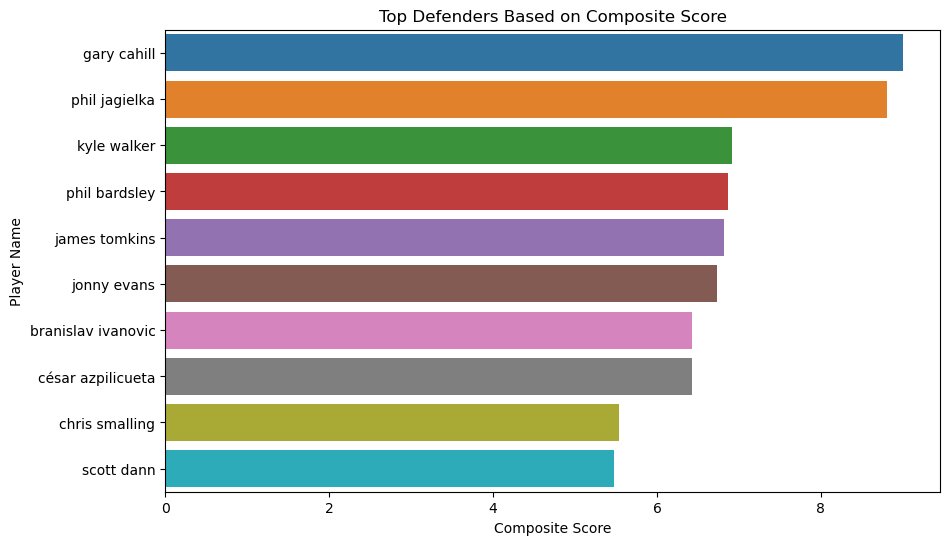

C:\Users\ehoml\AppData\Local\Temp\ipykernel_13576\3202867717.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_data['Composite Score'] = normalized_kpis.mean(axis=1)


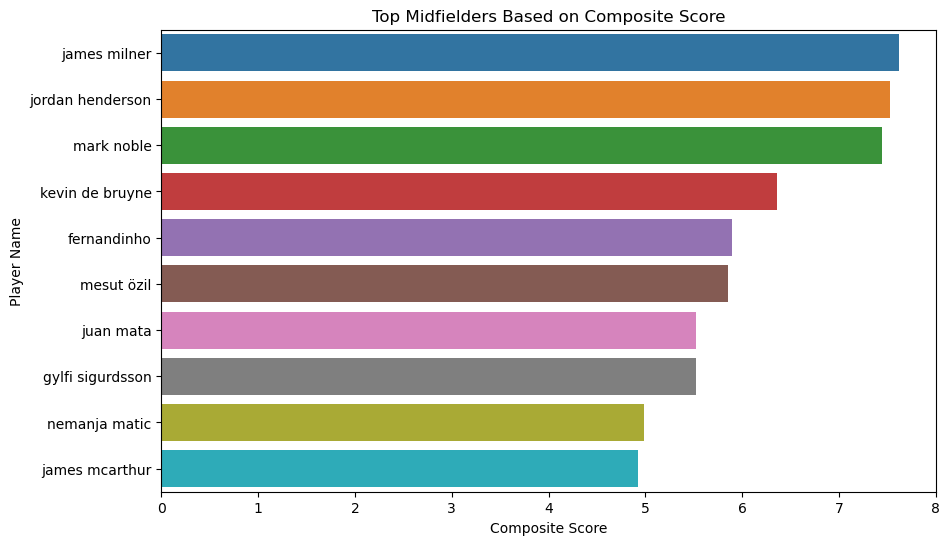

C:\Users\ehoml\AppData\Local\Temp\ipykernel_13576\3202867717.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_data['Composite Score'] = normalized_kpis.mean(axis=1)


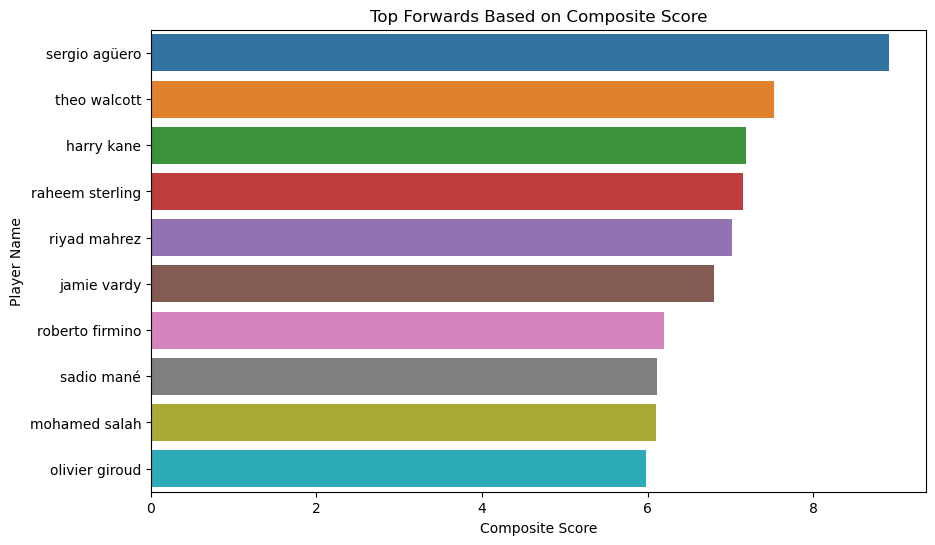

In [17]:
for position, kpis in position_kpis.items():
    position_data = df[df['Position'] == position]
    
    # Normalize the KPIs and calculate composite scores as before
    normalized_kpis = scaler.fit_transform(position_data[kpis].fillna(0))
    position_data['Composite Score'] = normalized_kpis.mean(axis=1)


    # Sort by Player Score and get the top players
    top_players = position_data.sort_values(by='Composite Score', ascending=False).head(10)

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Composite Score', y='Name', data=top_players)
    plt.title(f'Top {position}s Based on Composite Score')
    plt.xlabel('Composite Score')
    plt.ylabel('Player Name')
    plt.show()

In [18]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

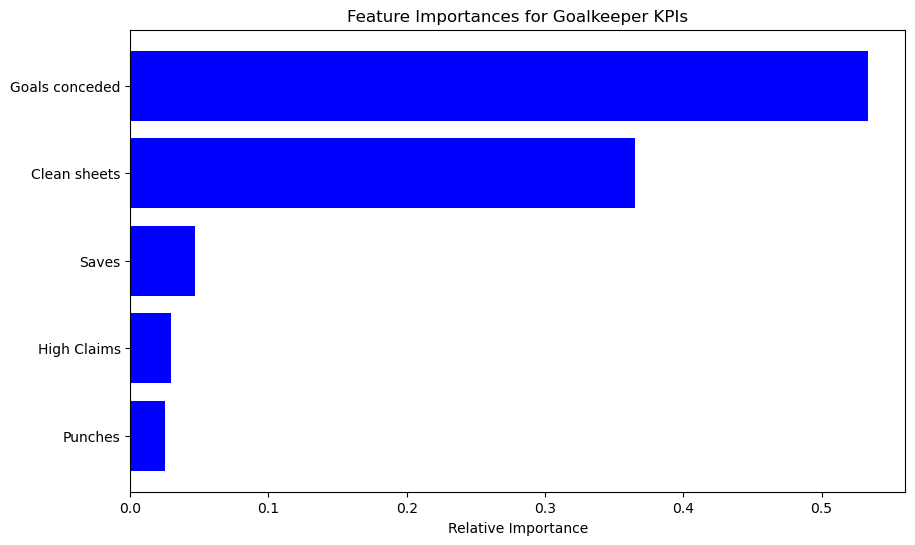

In [19]:
X = df[position_kpis['Goalkeeper']] #GK KPIs
y = df['Current Value']  #target variable

#Random Forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importances for Goalkeeper KPIs')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

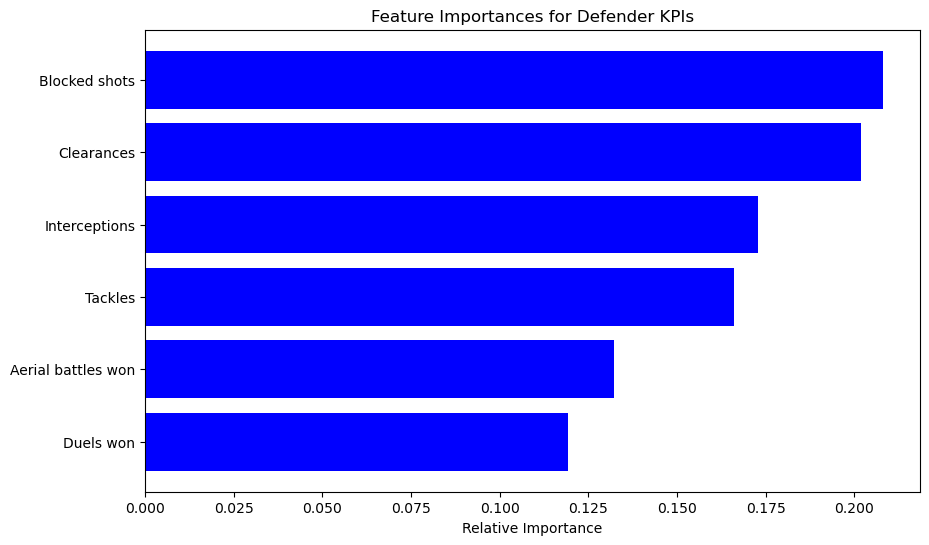

In [20]:
X = df[position_kpis['Defender']] #GK KPIs
y = df['Current Value']  #target variable

#Random Forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importances for Defender KPIs')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

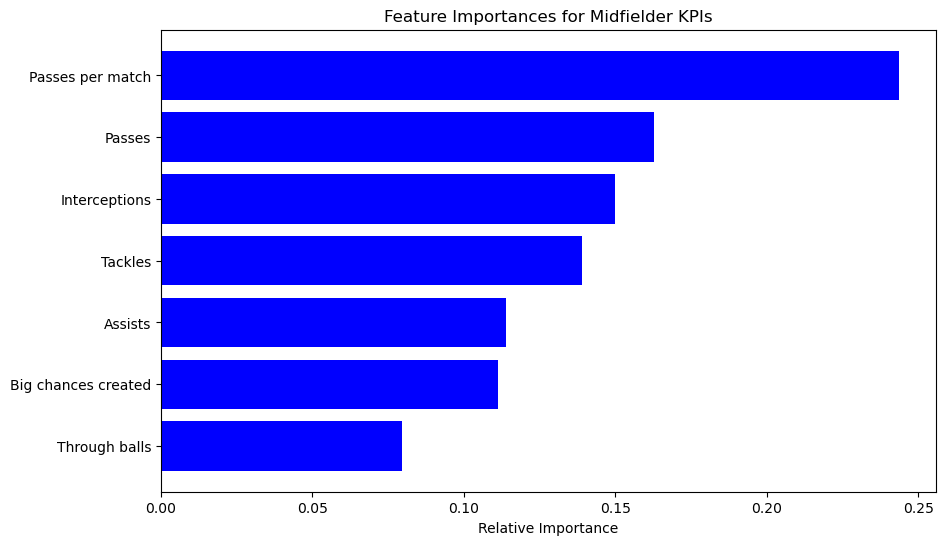

In [21]:
X = df[position_kpis['Midfielder']] #Midfield KPIs
y = df['Current Value']  #target variable

#Random Forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importances for Midfielder KPIs')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

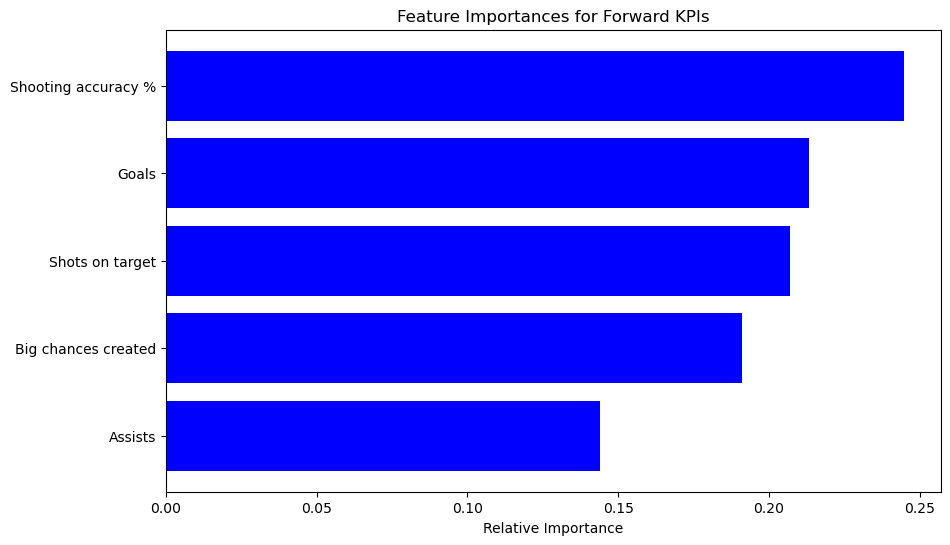

In [22]:
forward_data = df[df['Position'] == 'Forward']
forward_data = forward_data.dropna(subset=position_kpis['Forward'])
X = forward_data[position_kpis['Forward']]
y = forward_data['Current Value']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importances for Forward KPIs')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Value Assessment

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Use MinMaxScaler with feature range (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))

for position in df['Position'].unique():
    # Get the KPIs per position
    kpis = position_kpis[position]
    position_data = df[df['Position'] == position]
    
    # Scale the KPIs
    scaled_kpis = scaler.fit_transform(position_data[kpis].fillna(0))
    df.loc[position_data.index, 'Composite Score'] = scaled_kpis.mean(axis=1)

In [24]:
#Creation of a ratio that measures the composite score relative to the market value
df = df[df['Current Value'] > 0]
df['Value Ratio'] = df['Composite Score'] / df['Current Value']

In [25]:
#Sort the df to find players who are undervalued and overvalued
top_undervalued_players = df.sort_values(by='Value Ratio', ascending=False).head(10)
top_overvalued_players = df.sort_values(by='Value Ratio', ascending=True).head(10)

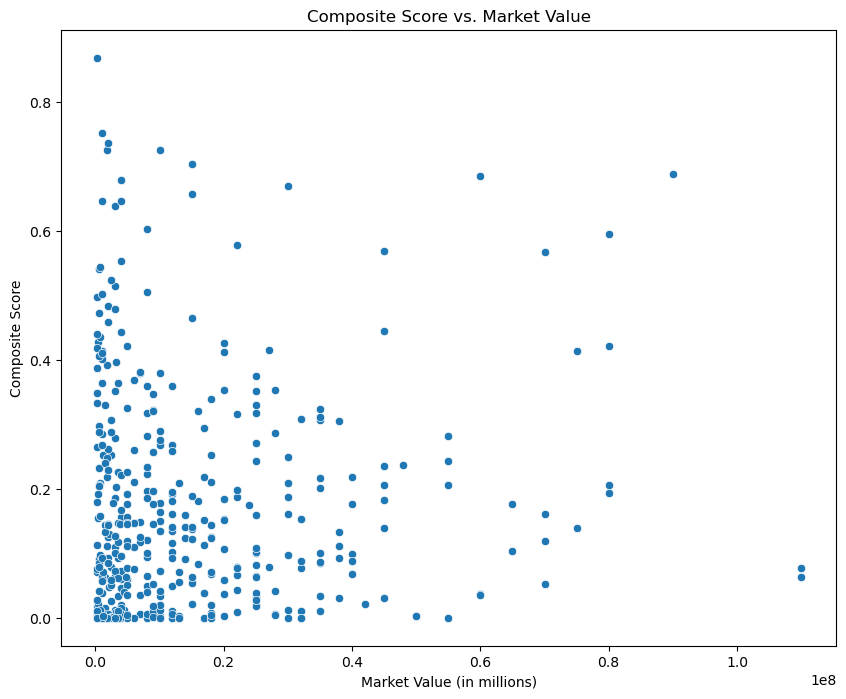

In [26]:
#plot of the relationship between composite scores and market values
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Current Value', y='Composite Score', data=df)
plt.title('Composite Score vs. Market Value')
plt.xlabel('Market Value (in millions)')
plt.ylabel('Composite Score')
plt.show()

In [27]:
#formula for undervalued player threshold
undervalued_threshold_score = df['Composite Score'].quantile(0.90) # top 10% performers
undervalued_threshold_value = df['Current Value'].quantile(0.25) # bottom 25% in value
undervalued_players = df[
    (df['Composite Score'] >= undervalued_threshold_score) &
    (df['Current Value'] <= undervalued_threshold_value)
]
print(undervalued_players[['Name', 'Position']].to_string(index=False))

            Name   Position
      david luiz   Defender
    erik pieters   Defender
 ashley westwood Midfielder
 wayne hennessey Goalkeeper
       joel ward   Defender
   james tomkins   Defender
      scott dann   Defender
  james mcarthur Midfielder
    theo walcott    Forward
    james milner Midfielder
     fernandinho Midfielder
      phil jones   Defender
       juan mata Midfielder
    andy carroll    Forward
   phil jagielka   Defender
      shane long    Forward
lukasz fabianski Goalkeeper


In [28]:
#formula for overvalued player threshold
overvalued_score_threshold = df['Composite Score'].quantile(0.25) # bottom 25% performers
overvalued_value_threshold = df['Current Value'].quantile(0.75) # top 25% in value
overvalued_players = df[
    (df['Composite Score'] <= overvalued_score_threshold) &
    (df['Current Value'] >= overvalued_value_threshold)
]
print(overvalued_players[['Name', 'Position']].to_string(index=False))

               Name   Position
     kieran tierney   Defender
     william saliba   Defender
  gabriel magalhães   Defender
   emile smith rowe Midfielder
       jacob ramsey Midfielder
      ollie watkins    Forward
     robert sánchez Goalkeeper
          ben white   Defender
alexis mac allister Midfielder
    tyrick mitchell   Defender
       eberechi eze Midfielder
     pascal struijk   Defender
   timothy castagne   Defender
     harvey elliott Midfielder
      ferran torres    Forward
         juan foyth   Defender
    conor gallagher Midfielder
            vitinha Midfielder


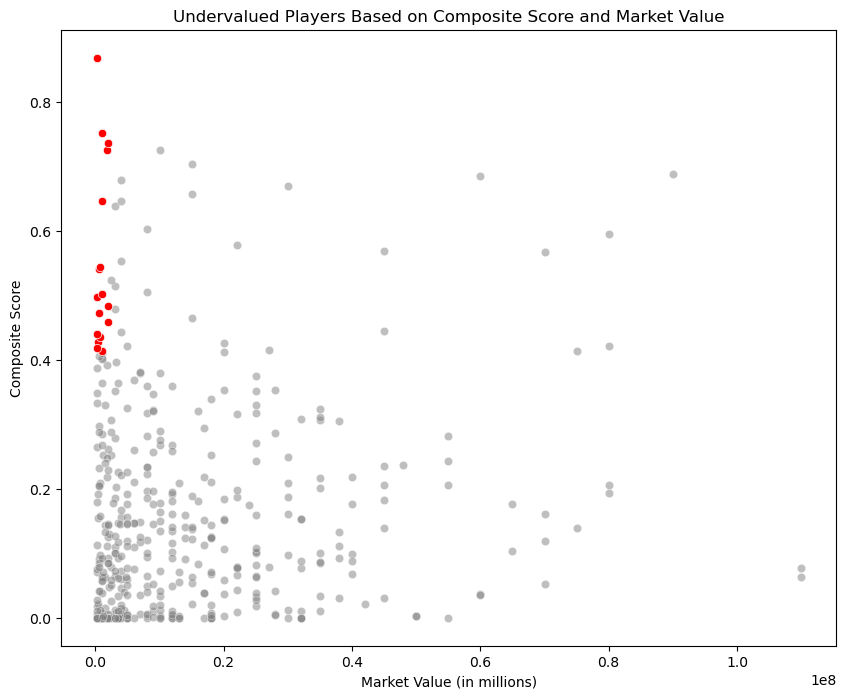

In [29]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Current Value', y='Composite Score', data=df, color='grey', alpha=0.5)
sns.scatterplot(x='Current Value', y='Composite Score', data=undervalued_players, color='red') #red points indicate undervalued
plt.title('Undervalued Players Based on Composite Score and Market Value')
plt.xlabel('Market Value (in millions)')
plt.ylabel('Composite Score')
plt.show()

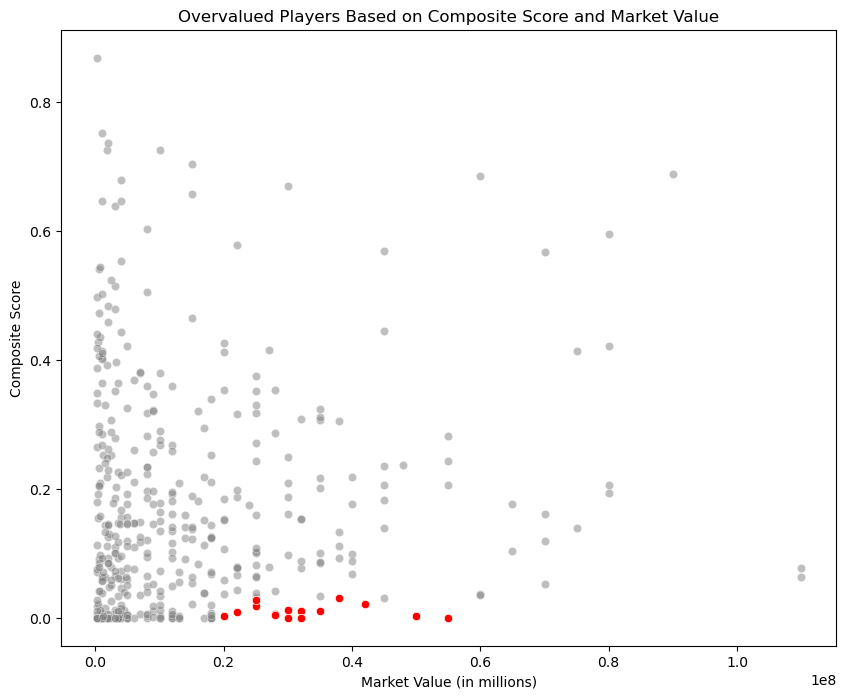

In [30]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Current Value', y='Composite Score', data=df, color='grey', alpha=0.5)
sns.scatterplot(x='Current Value', y='Composite Score', data=overvalued_players, color='red')
plt.title('Overvalued Players Based on Composite Score and Market Value')
plt.xlabel('Market Value (in millions)')
plt.ylabel('Composite Score')
plt.show()

# Young Talent Identification

In [31]:
#typical age for young player playing at elite level
age_threshold = 23

In [32]:
#calculation for young player composite score
young_players = df[df['Age'] <= age_threshold]

In [33]:
# identify players with high scores which may be above threshold
performance_threshold = young_players['Composite Score'].quantile(0.75)
talents = young_players[young_players['Composite Score'] >= performance_threshold]

In [34]:
#additional constraint to find affordable young talent
value_threshold = young_players['Current Value'].quantile(0.5)
emerging_talents = talents[talents['Current Value'] <= value_threshold]

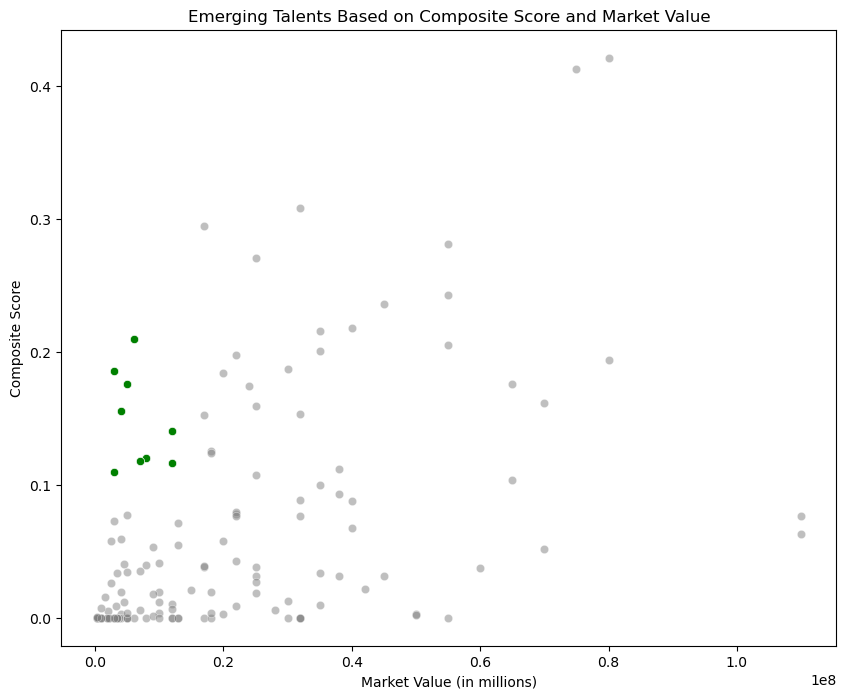

In [35]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Current Value', y='Composite Score', data=young_players, color='grey', alpha=0.5)
sns.scatterplot(x='Current Value', y='Composite Score', data=emerging_talents, color='green')
plt.title('Emerging Talents Based on Composite Score and Market Value')
plt.xlabel('Market Value (in millions)')
plt.ylabel('Composite Score')
plt.show()

In [36]:
#list the players, age, and value
print(emerging_talents[['Name', 'Age', 'Current Value', 'Composite Score']].to_string(index=False))

                  Name  Age  Current Value  Composite Score
ainsley maitland-niles 23.0      8000000.0         0.120351
          reiss nelson 20.0      7000000.0         0.117872
                wesley 23.0      6000000.0         0.209625
          keinan davis 22.0      3000000.0         0.109840
        aaron connolly 20.0      4000000.0         0.155689
         mason holgate 23.0     12000000.0         0.116190
            tom davies 22.0     12000000.0         0.140555
         tyler roberts 21.0      3000000.0         0.185672
       michael obafemi 20.0      5000000.0         0.175750


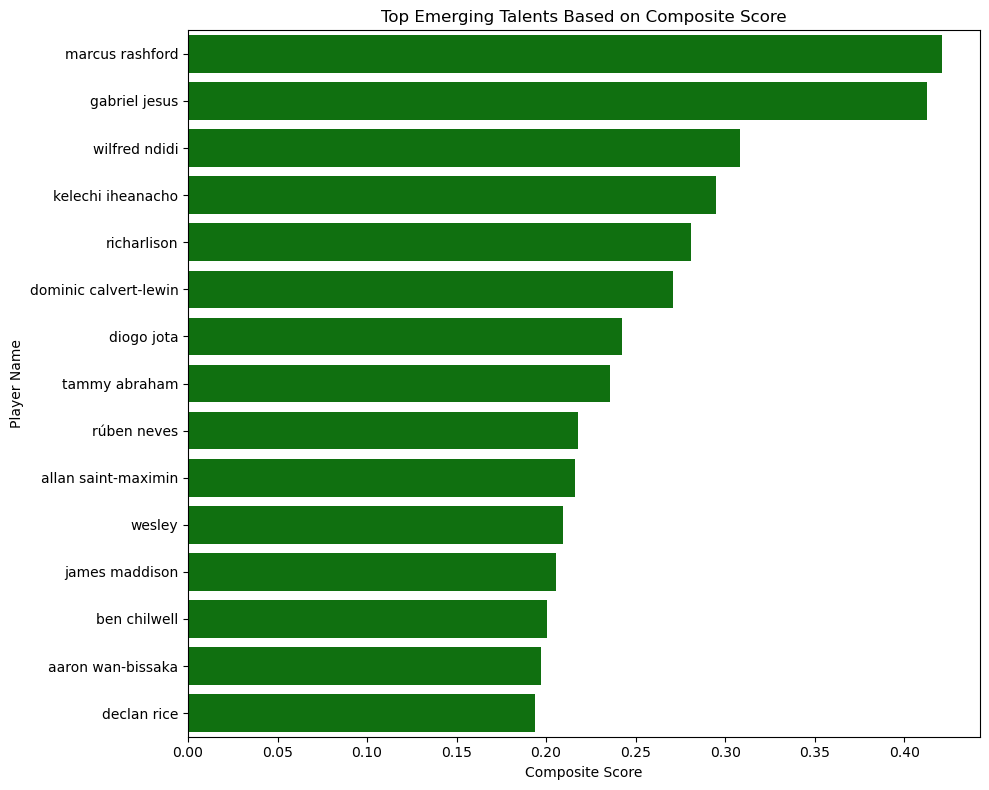

In [37]:
#barchart for top 10 young performers in the top 10%
sorted_talents = talents.sort_values(by='Composite Score', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Composite Score', y='Name', data=sorted_talents.head(15), color='green')
plt.title('Top Emerging Talents Based on Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Player Name')
plt.tight_layout()
plt.show()